## <span style="color:darkblue">**Лабораторная работа 3. Построение системы нечеткого вывода. Задание**</span> 

### <span style="color:darkred">**Пожалуйста соблюдайте следующее наименование Ваших проектов:**</span> 

**L**[Номер Лабораторной Работы]**N**[Ващ Номер по Списку]**.ipynb**.

**Например:** L3N1.ipynb

### Подключение библиотеки к своему проекту:

In [3]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random

# установка вывода графиков в окне jupiter
%matplotlib inline

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

Импортируем необходимые пакеты по нечёткой логике:

In [4]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Практическое задание

### Исходные данные:

**13. Какую заработную плату выплачивать новому сотруднику?**  
Данная задача описывается следующими предложениями:  
•	Если образование высшее или стаж большой, то заработная плата высокая.  
•	Если образование средне-техническое или стаж имеется, но не большой, то заработная плата средняя.  
•	Если образование среднее или стаж маленький, то заработная плата низкая.

Образование оценивается по 10 бальной шкале (0 – среднее, 5 – средне-техническое, 10 – высшее). Стаж также оценивается по 10 бальной шкале (0 – маленький, 10 – большой). 

### <span style="color:darkred">Задача: построить для выбранного варианта систему нечеткого вывода</span>

## Небольшая заготовка для выполнения Вашего задания:

**Задача:<span style="color:darkred"> Какую заработную плату выплачивать новому сотруднику?</span>**
    
Данная задача описывается следующими предложениями:  
•	Если образование высшее или стаж большой, то заработная плата высокая.  
•	Если образование средне-техническое или стаж имеется, но не большой, то заработная плата средняя.  
•	Если образование среднее или стаж маленький, то заработная плата низкая.

Образование оценивается по 10 бальной шкале (0 – среднее, 5 – средне-техническое, 10 – высшее). Стаж также оценивается по 10 бальной шкале (0 – маленький, 10 – большой)


#### 1. Формирование базы правил
База правил — это множество правил, где каждому подзаключению сопоставлен определенный весовой коэффициент.

База правил может иметь следующий вид (для примера используются правила различных конструкций):

RULE_1: IF «Condition_1» THEN «Conclusion_1» (F1) AND «Conclusion_2» (F2);  
RULE_2: IF «Condition_2» AND «Condition_3» THEN «Conclusion_3» (F3);  
…  
RULE_n: IF «Condition_k» THEN «Conclusion_(q-1)» (Fq-1) AND «Conclusion_q» (Fq);  

In [5]:
education = ctrl.Antecedent(np.linspace(0, 10, 1000), 'education')
experience = ctrl.Antecedent(np.linspace(0, 10, 1000), 'experience')

Определим выходную переменную (для нашего примера: чаевые)

In [6]:
salary = ctrl.Consequent(np.linspace(0, 25, 1000), 'salary')

#### 2. Фаззификация входных переменных
Этап приведения к нечеткости. На вход поступают сформированная база правил и входные данные (quality, service). Целью этого этапа является получение значений истинности для всех подусловий из базы правил. 
Это происходит так: для каждого из подусловий находятся значения для $\mu_{quality}(x_i)$ и для $\mu_{service}(x_i)$. Таким образом получается множество нечетких значений.

Воспользуемся функцией генерации распределения (варианты: 3,5,7):

In [7]:
education.automf(3)

/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


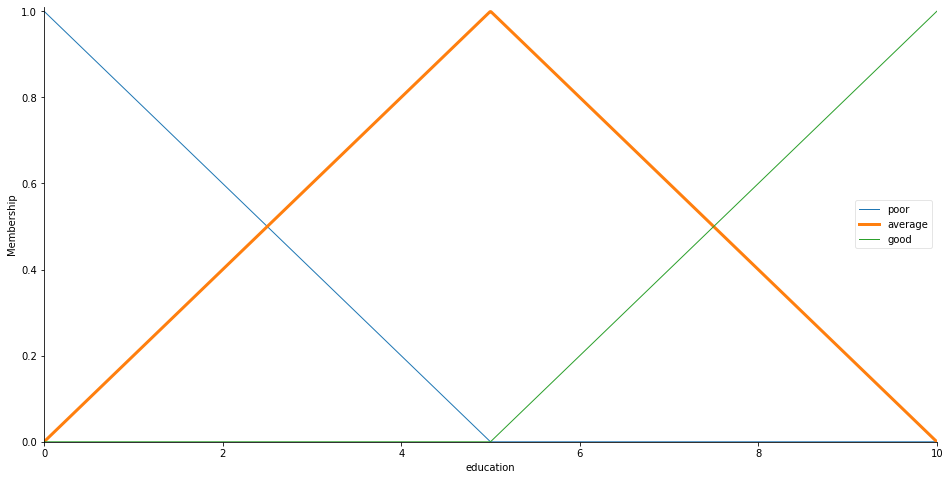

In [8]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# графический вывод
education['average'].view();

In [14]:
experience.automf(3)

/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


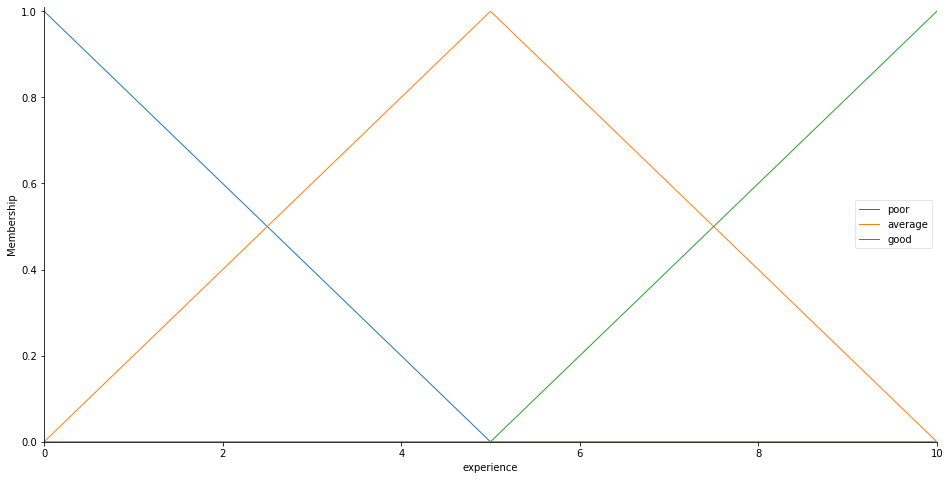

In [15]:
# графический вывод
experience.view();

Задание распределения чаевых:

In [16]:
#salary['low'] = fuzz.trimf(salary.universe, [0, 0, 13])
#salary['medium'] = fuzz.trimf(salary.universe, [0, 13, 25])
#salary['high'] = fuzz.trimf(salary.universe, [13, 25, 25])
experience.automf(3)

/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


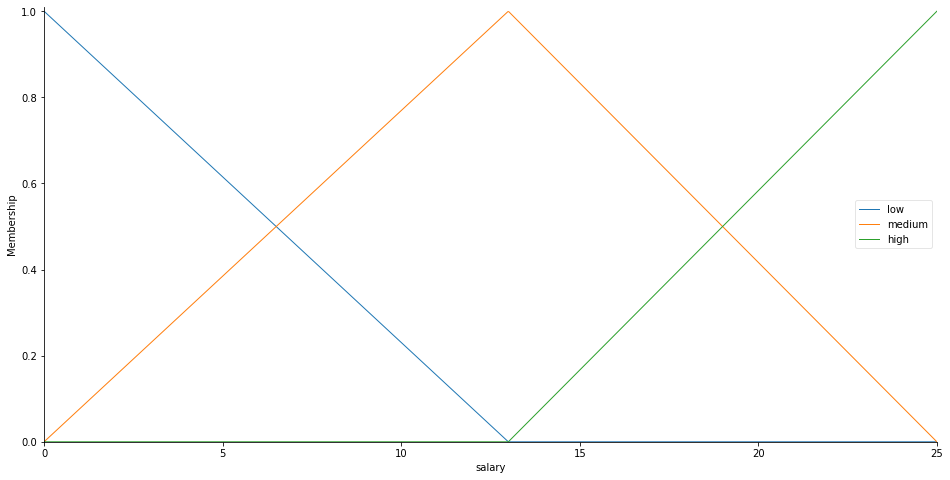

In [17]:
# графический вывод
salary.view();

#### 3. Агрегирование подусловий
Условие правил может быть составным, т.е. включать подусловия, связанные между собой при помощи логической операции «AND». Целью этого этапа является определение степени истинности условий для каждого правила системы нечеткого вывода. Упрощенно говоря, для каждого условия находим минимальное значение истинности всех его подусловий.

• Если образование высшее или стаж большой, то заработная плата высокая.

• Если образование средне-техническое или стаж имеется, но не большой, то заработная плата средняя.

• Если образование среднее или стаж маленький, то заработная плата низкая.


In [20]:
rule1 = ctrl.Rule(education['good'] | experience['good'], salary['high'])
rule2 = ctrl.Rule(education['average'] | experience['average'], salary['medium'])
rule3 = ctrl.Rule(education['poor'] | experience['poor'], salary['low'])

#### Этап 4. Активизация подзаключений

Цель этапа — получение совокупности «активизированных» нечетких множеств для каждого из подзаключений в базе правил.

Активизация в общем случае во многом аналогична композиции нечетких отношений, но не тождественна  ей. Поскольку в системах  нечеткого  вывода  используются  лингвистические переменные, то формулы для нечеткой композиции теряют свое значение. В действительности при формировании базы правил системы нечеткого вывода задаются весовые коэффициенты для каждого правила (по умолчанию предполагается, если весовой коэффициент не задан явно, то его значение равно 1).

**Этап 5. Акумуляция заключений**

Аккумуляция  или  аккумулирование  в  системах  нечеткого  вывода  представляет  собой процедуру или процесс нахождения функции принадлежности для каждой из выходных лингвистических переменных множества.

Цель аккумуляции заключается в том, чтобы объединить или аккумулировать все степени истинности заключений (подзаключений) для получения функции принадлежности каждой из выходных переменных. Причина необходимости выполнения этого этапа состоит в том,  что  подзаключения, относящиеся к одной и той же выходной лингвистической переменной, принадлежат различным правилам системы нечеткого вывода.

Этап  аккумуляции  считается  законченным,  когда  для  каждой  из  выходных  лингвистических  переменных  будут  определены  итоговые  функции  принадлежности  нечетких множеств их значений.

In [21]:
salary_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [22]:
salary_calculation = ctrl.ControlSystemSimulation(salary_ctrl)

In [30]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
salary_calculation.input['education'] = 5
salary_calculation.input['experience'] = 10

#### Этап 6. Дефаззификация выходных переменных
Цель дефаззификациии получить количественное значение (crisp value) для каждой из выходных лингвистических переменных.

In [31]:
# Crunch the numbers
salary_calculation.compute()

# вывод результата
print(salary_calculation.output['salary'])

14.666664808760142


14.666664808760142


/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


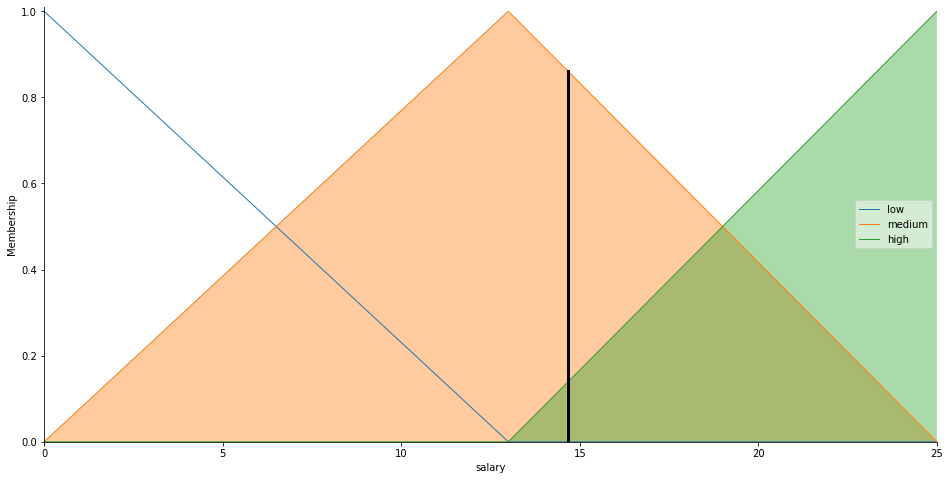

In [32]:
print(salary_calculation.output['salary'])
salary.view(sim=salary_calculation)

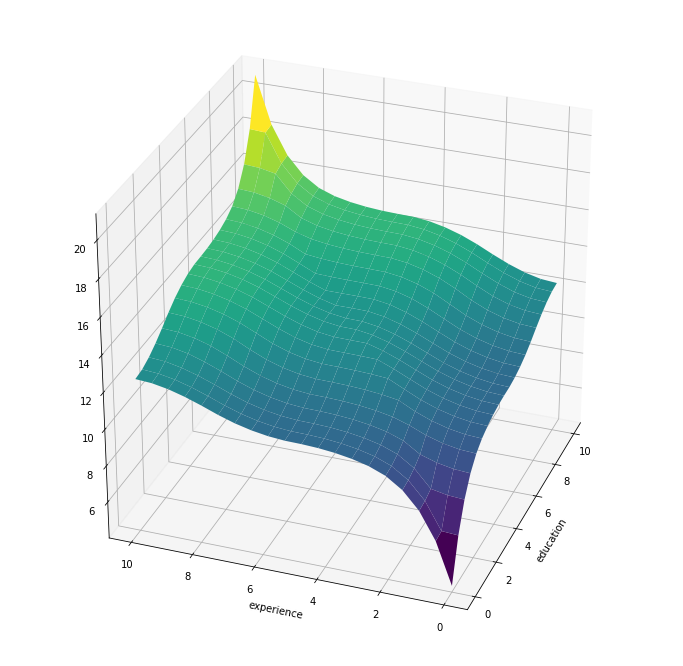

In [33]:
# We can simulate at higher resolution with full accuracy
inval = np.linspace(0, 10, 20)
x, y = np.meshgrid(inval, inval)
z = np.zeros_like(x)

# Loop through the system [q x s] times to collect the control surface
for i in range(20):
    for j in range(20):
        salary_calculation.input['education'] = x[i, j]
        salary_calculation.input['experience'] = y[i, j]
        salary_calculation.compute()
        z[i, j] = salary_calculation.output['salary']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

ax.set_xlabel('education')
ax.set_ylabel('experience')

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)